In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
from pylab import rcParams

# Membaca data dari file CSV
df = pd.read_csv("prep.csv")

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

# Fungsi parser untuk menguraikan kolom datetime_iso
parser = lambda datetime_iso: pd.to_datetime(datetime_iso, format='%Y-%m-%d %H:%M:%S%z')

# Membaca data dari file CSV
data = pd.read_csv('prep.csv',
                   engine='python',
                   parse_dates=['datetime_iso'],
                   date_parser=parser)

# Mengatur kolom datetime_iso sebagai indeks data
data.set_index('datetime_iso', inplace=True)

# Visualisasi data (contoh: mencetak 5 baris pertama)
print(data.head())

                            datetime  time-zone   temp  d_point  feels  \
datetime_iso                                                             
1979-01-01 00:00:00+00:00  283996800      28800  24.75    23.89  25.76   
1979-01-01 01:00:00+00:00  284000400      28800  24.58    23.73  25.57   
1979-01-01 02:00:00+00:00  284004000      28800  26.60    24.06  26.60   
1979-01-01 03:00:00+00:00  284007600      28800  27.31    24.37  30.90   
1979-01-01 04:00:00+00:00  284011200      28800  27.41    25.05  31.54   

                           min_temp  max_temp  prssr   hum  wind_spd  \
datetime_iso                                                           
1979-01-01 00:00:00+00:00     24.28     25.22   1012  95.0      0.82   
1979-01-01 01:00:00+00:00     23.99     25.26   1012  95.0      0.96   
1979-01-01 02:00:00+00:00     26.10     27.39   1012  86.0      1.22   
1979-01-01 03:00:00+00:00     26.59     28.36   1012  84.0      1.08   
1979-01-01 04:00:00+00:00     26.58     28.31   1

In [5]:
data.tail()

,datetime,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,sea_level,grnd_level,rain_3h,snow_1h,snow_3h,visibility
datetime_iso,,,,,,,,,,,,,,,,,,,
2017-12-31 19:00:00+00:00,1514746800,28800,25.06,24.55,131.53,24.44,25.69,1007,97.00,0.90,13.0,0.00,99.0,undetermined,NaN,0,0,0,NaN
2017-12-31 20:00:00+00:00,1514750400,28800,24.51,24.17,25.58,23.89,25.13,1006,98.00,0.85,21.0,NaN,100.0,undetermined,undetermined,NaN,NaN,0,NaN
2017-12-31 21:00:00+00:00,1514754000,28800,24.63,24.29,129.32,24.00,126.96,1007,98.00,1.54,26.0,0.00,97.0,NaN,undetermined,NaN,0,no_snow,NaN
2017-12-31 22:00:00+00:00,1514757600,28800,26.68,24.71,29.76,25.02,27.25,1008,0.89,1.46,17.0,0.30,98.0,undetermined,NaN,0,0,volume:0,NaN
2017-12-31 23:00:00+00:00,1514761200,28800,26.49,24.90,26.49,26.02,27.09,1008,91.00,1.56,6.0,0.19,99.0,undetermined,not recorded,no-rain,0,NaN,NaN


In [6]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['sea_level', 'grnd_level', 'rain_3h', 'snow_1h', 'snow_3h', 'visibility']
df.drop(columns=columns_to_drop, inplace=True)

# Sekarang DataFrame df hanya akan berisi kolom yang tersisa

In [7]:
print(df.columns)

Index(['datetime', 'datetime_iso', 'time-zone', 'temp', 'd_point', 'feels',
       'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg',
       'rain_1h', 'clouds'],
      dtype='object')


In [8]:
df

,datetime,datetime_iso,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75,23.89,25.76,24.28,25.22,1012,95.00,0.82,320.0,0.00,100.0
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58,23.73,25.57,23.99,25.26,1012,95.00,0.96,338.0,0.00,100.0
2,284004000,1979-01-01 02:00:00+00:00,28800,26.60,24.06,26.60,26.10,27.39,1012,86.00,1.22,339.0,0.00,99.0
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31,24.37,30.90,26.59,28.36,1012,84.00,1.08,342.0,0.13,94.0
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,25.05,31.54,26.58,28.31,1011,87.00,0.86,336.0,0.34,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,1514746800,2017-12-31 19:00:00+00:00,28800,25.06,24.55,131.53,24.44,25.69,1007,97.00,0.90,13.0,0.00,99.0
341876,1514750400,2017-12-31 20:00:00+00:00,28800,24.51,24.17,25.58,23.89,25.13,1006,98.00,0.85,21.0,NaN,100.0
341877,1514754000,2017-12-31 21:00:00+00:00,28800,24.63,24.29,129.32,24.00,126.96,1007,98.00,1.54,26.0,0.00,97.0
341878,1514757600,2017-12-31 22:00:00+00:00,28800,26.68,24.71,29.76,25.02,27.25,1008,0.89,1.46,17.0,0.30,98.0


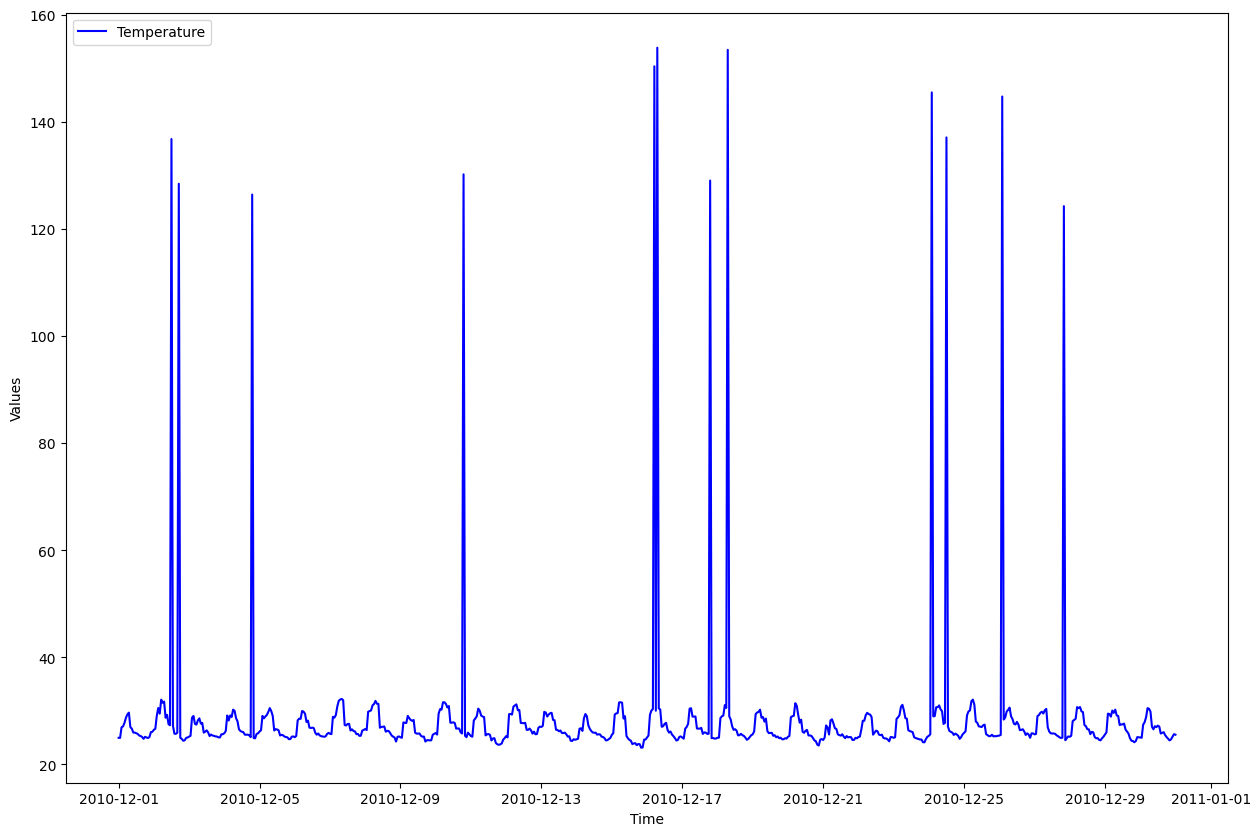

In [15]:
import pandas as pd

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
december_2010_data = df[(df['datetime'] >= '2010-12-01') & (df['datetime'] <= '2010-12-31')]

# Contoh penggunaan fungsi show_plot dengan data Desember 2010
show_plot(
    december_2010_data,
    x_column="datetime",
    y_columns=[
        # "datetime_iso",
        # "time-zone",
        "temp",
        # "d_point",
        # "feels",
        # "min_temp",
        # "max_temp",
        # "prssr",
        # "hum",
        # "wind_spd",
        # "wind_deg",
        # "rain_1h",
        # "clouds",
    ],
    figsize=(15, 10),
    xlabel="Time",
    ylabel="Values",
    labels=[
        # "Datetime ISO",
        # "Time Zone",
        "Temperature",
        # "Dew Point",
        # "Feels Like",
        # "Min Temperature",
        # "Max Temperature",
        # "Pressure",
        # "Humidity",
        # "Wind Speed",
        # "Wind Degree",
        # "Rain (1h)",
        # "Clouds",
    ],
)


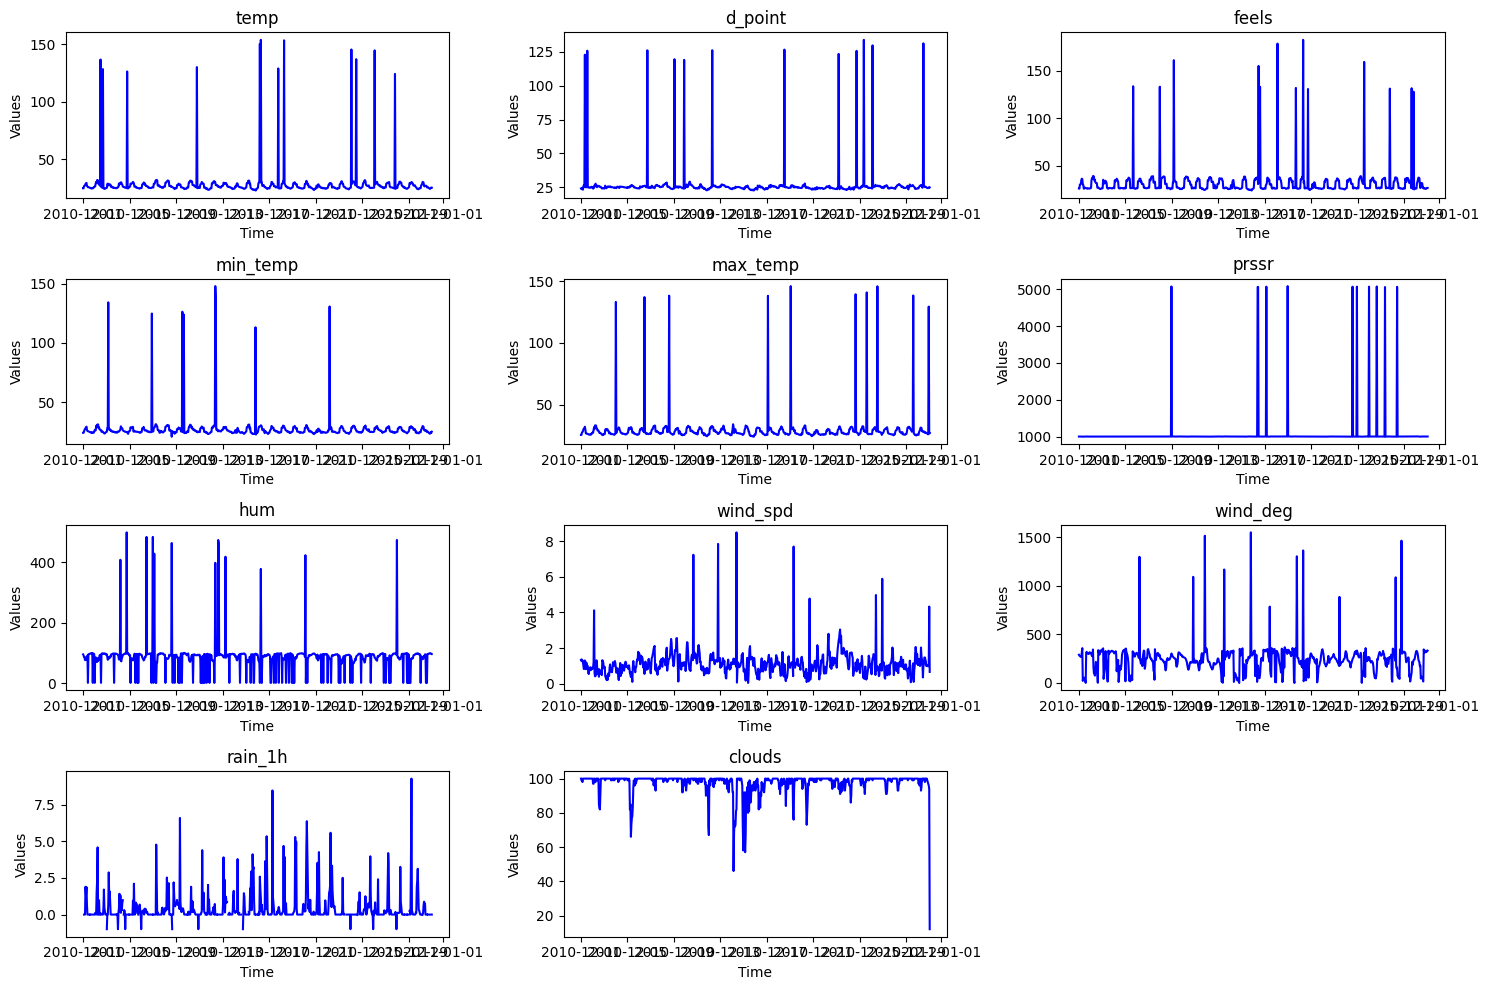

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def show_plots(data, x_column, y_columns, figsize=(15, 10), xlabel="Time", ylabel="Values", labels=None):
    num_plots = len(y_columns)
    num_cols = 3  # Jumlah kolom dalam tampilan

    # Menghitung jumlah baris berdasarkan jumlah plot dan kolom
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Membuat subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.ravel()  # Meratakan array dari subplot

    for i, y_column in enumerate(y_columns):
        ax = axes[i]
        ax.plot(data[x_column], data[y_column], color="blue")
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(labels[i] if labels else y_column)

    # Menghilangkan subplot yang tidak digunakan
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Memanggil fungsi show_plots dengan data yang sesuai
show_plots(
    december_2010_data,
    x_column="datetime",
    y_columns=["temp", "d_point", "feels", "min_temp", "max_temp", "prssr", "hum", "wind_spd", "wind_deg", "rain_1h", "clouds"],
    figsize=(15, 10),
    xlabel="Time",
    ylabel="Values",
)


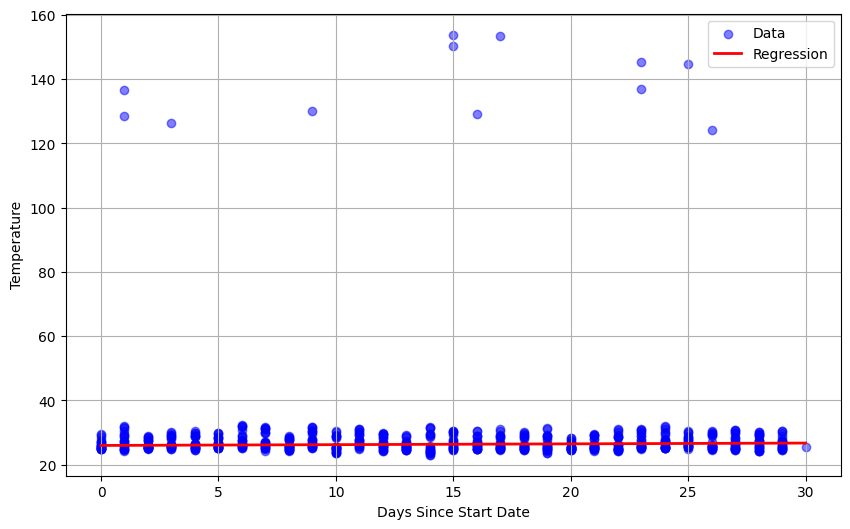

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import TheilSenRegressor

# Fungsi untuk memplot data dan regresi
def plot_data_and_regression(x, y, y_pred, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data', color='blue', alpha=0.5)
    plt.plot(x, y_pred, label='Regression', color='red', linewidth=2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

# Baca data dari file CSV atau sumber data lainnya
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Tentukan variabel independen (x) dan dependen (y)
x = (december_2010_data['datetime'] - start_date).dt.days  # Menghitung jumlah hari sejak tanggal awal
y = december_2010_data['temp']  # Misalnya, kita menggunakan suhu sebagai dependen

# Inisialisasi model Regresi Theil-Sen
regressor = TheilSenRegressor(random_state=0)

# Melatih model pada data
regressor.fit(x.values.reshape(-1, 1), y)

# Memprediksi nilai suhu berdasarkan tanggal
y_pred = regressor.predict(x.values.reshape(-1, 1))

# Memplot data dan regresi
plot_data_and_regression(x, y, y_pred, x_label="Days Since Start Date", y_label="Temperature")


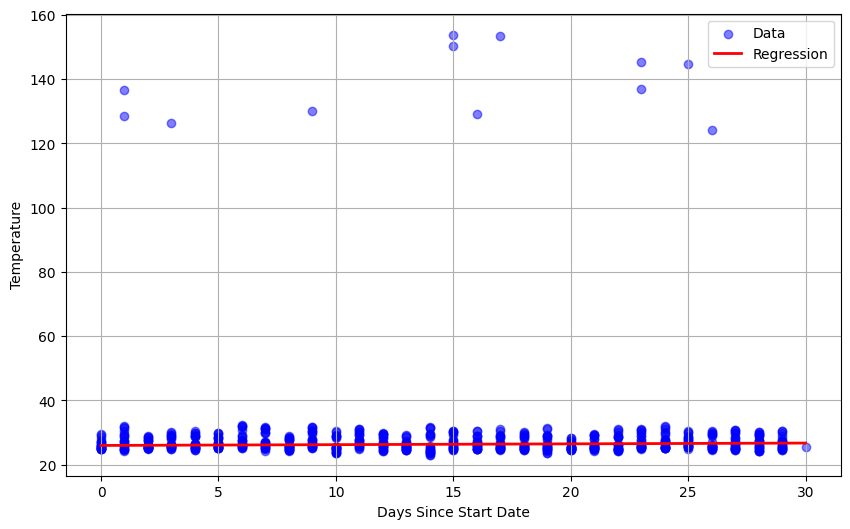

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import TheilSenRegressor

# Fungsi untuk memplot data dan regresi
def plot_data_and_regression(x, y, y_pred, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data', color='blue', alpha=0.5)
    plt.plot(x, y_pred, label='Regression', color='red', linewidth=2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

# Baca data dari file CSV atau sumber data lainnya
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Tentukan variabel independen (x) dan dependen (y)
x = (december_2010_data['datetime'] - start_date).dt.days  # Menghitung jumlah hari sejak tanggal awal
y = december_2010_data['temp']  # Kolom suhu sebagai variabel dependen

# Inisialisasi model Regresi Theil-Sen
regressor = TheilSenRegressor(random_state=0)

# Melatih model pada data
regressor.fit(x.values.reshape(-1, 1), y)

# Memprediksi nilai suhu berdasarkan tanggal
y_pred = regressor.predict(x.values.reshape(-1, 1))

# Memplot data dan regresi
plot_data_and_regression(x, y, y_pred, x_label="Days Since Start Date", y_label="Temperature")

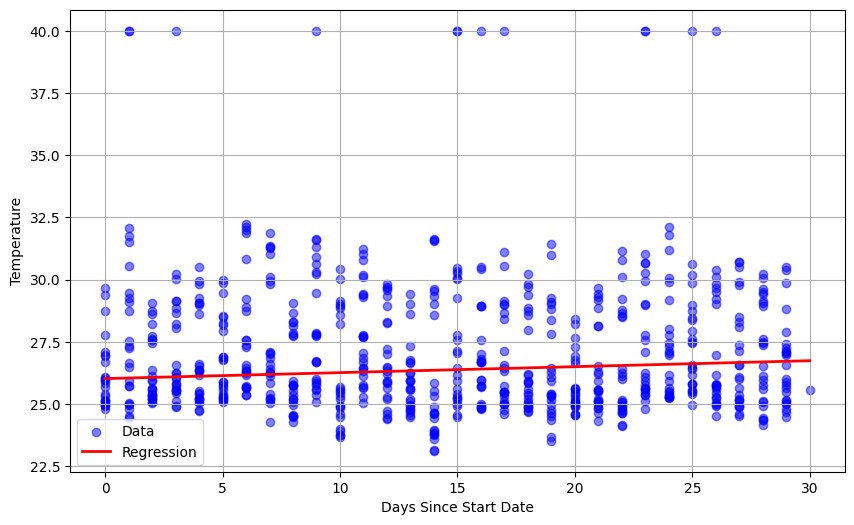

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import TheilSenRegressor

# Fungsi untuk membatasi nilai ekstrem
def limit_extreme_values(data, lower_limit, upper_limit):
    data_clipped = data.clip(lower=lower_limit, upper=upper_limit)
    return data_clipped

# Fungsi untuk memplot data dan regresi
def plot_data_and_regression(x, y, y_pred, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data', color='blue', alpha=0.5)
    plt.plot(x, y_pred, label='Regression', color='red', linewidth=2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

# Baca data dari file CSV atau sumber data lainnya
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Tentukan variabel independen (x) dan dependen (y)
x = (december_2010_data['datetime'] - start_date).dt.days  # Menghitung jumlah hari sejak tanggal awal
y = december_2010_data['temp']  # Kolom suhu sebagai variabel dependen

# Batasi nilai ekstrem suhu
lower_limit = -30  # Batas bawah
upper_limit = 40  # Batas atas
y = limit_extreme_values(y, lower_limit, upper_limit)

# Inisialisasi model Regresi Theil-Sen
regressor = TheilSenRegressor(random_state=0)

# Melatih model pada data
regressor.fit(x.values.reshape(-1, 1), y)

# Memprediksi nilai suhu berdasarkan tanggal
y_pred = regressor.predict(x.values.reshape(-1, 1))

# Memplot data dan regresi
plot_data_and_regression(x, y, y_pred, x_label="Days Since Start Date", y_label="Temperature")

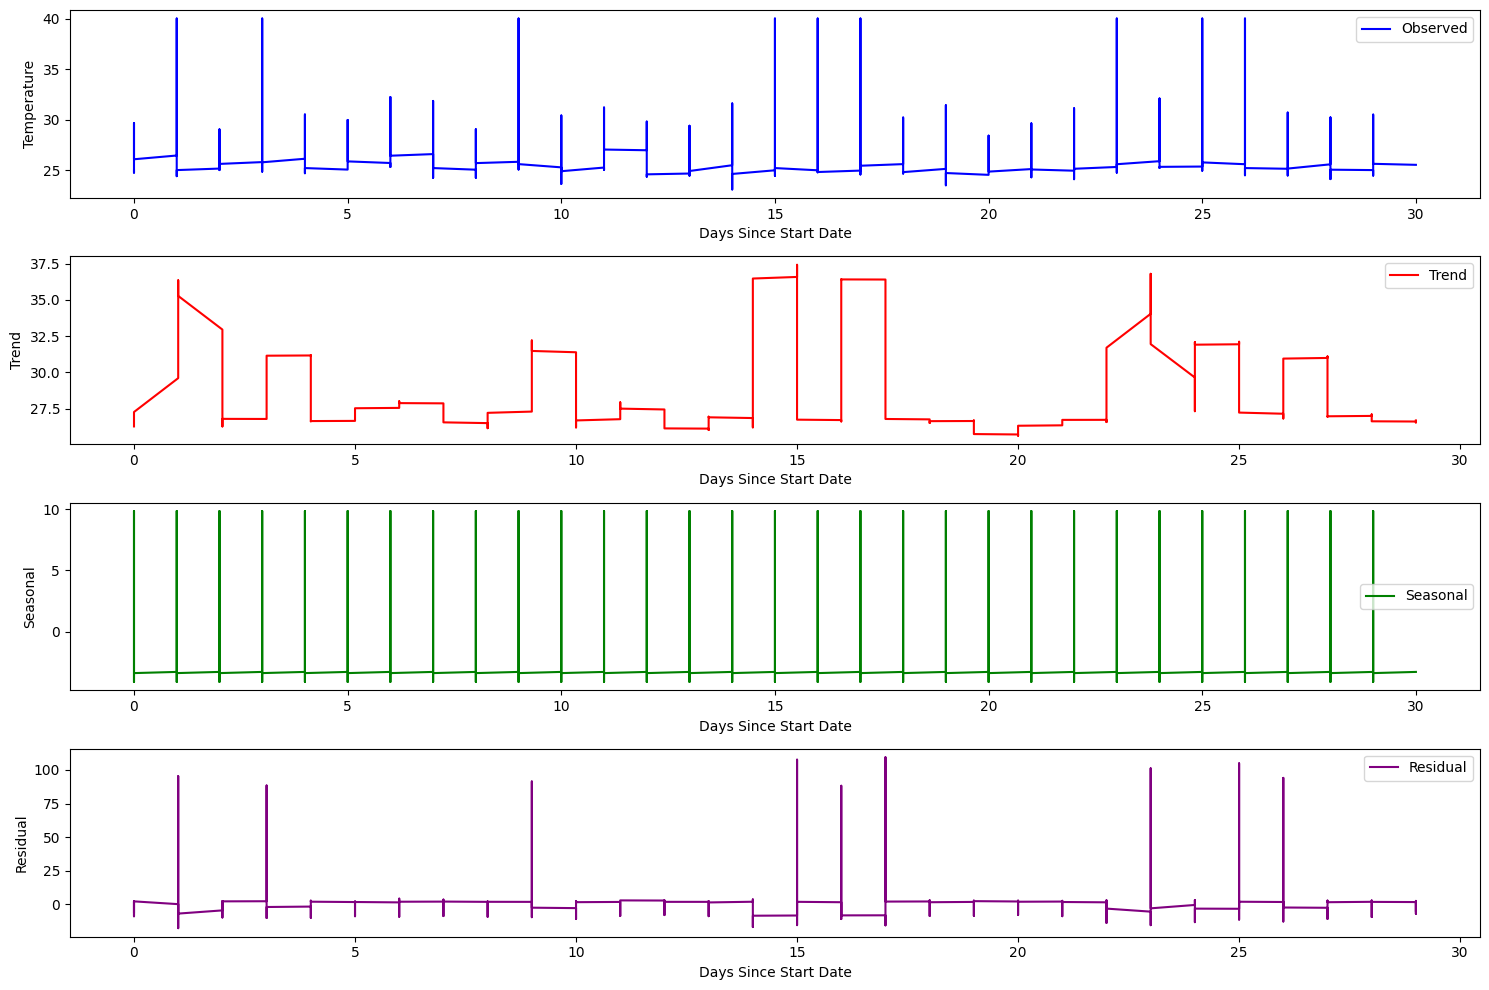

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV atau sumber data lainnya
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Tentukan variabel independen (x) dan dependen (y)
x = (december_2010_data['datetime'] - start_date).dt.days  # Menghitung jumlah hari sejak tanggal awal
y = december_2010_data['temp']  # Kolom suhu sebagai variabel dependen

# Batasi nilai ekstrem suhu
lower_limit = -30  # Batas bawah
upper_limit = 40  # Batas atas
y = y.clip(lower=lower_limit, upper=upper_limit)

# Membuat DataFrame dengan indeks waktu
december_2010_data['datetime'] = pd.to_datetime(december_2010_data['datetime'], unit='s')
december_2010_data.set_index('datetime', inplace=True)

# Melakukan Time Series Decomposition
result = seasonal_decompose(december_2010_data['temp'], model='additive')

# Plot hasil decomposition
plt.figure(figsize=(15, 10))

plt.subplot(411)
plt.plot(x, y, label='Observed', color="blue")
plt.xlabel("Days Since Start Date")
plt.ylabel("Temperature")
plt.legend()

plt.subplot(412)
plt.plot(x, result.trend, label='Trend', color="red")
plt.xlabel("Days Since Start Date")
plt.ylabel("Trend")
plt.legend()

plt.subplot(413)
plt.plot(x, result.seasonal, label='Seasonal', color="green")
plt.xlabel("Days Since Start Date")
plt.ylabel("Seasonal")
plt.legend()

plt.subplot(414)
plt.plot(x, result.resid, label='Residual', color="purple")
plt.xlabel("Days Since Start Date")
plt.ylabel("Residual")
plt.legend()

plt.tight_layout()
plt.show()


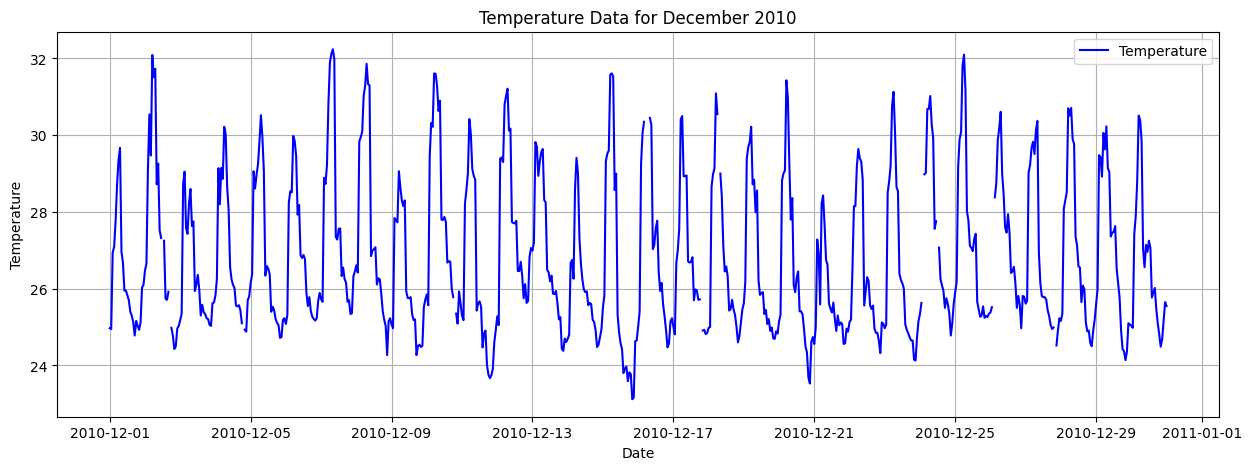

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Baca data dari file 'trend_data.csv'
trend_data = pd.read_csv("trend_data.csv")

# Ganti nilai kolom 'temp' yang lebih dari 40 dengan nilai dari 'trend_data.csv'
december_2010_data.loc[december_2010_data['temp'] > 40, 'temp'] = trend_data['trend']

# Tampilkan visualisasi data
plt.figure(figsize=(15, 5))
plt.plot(december_2010_data['datetime'], december_2010_data['temp'], label='Temperature', color="blue")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Data for December 2010")
plt.legend()
plt.grid(True)
plt.show()


In [74]:
trend.describe()

count    721.000000
mean      28.579210
std        3.328787
min       17.520837
25%       26.578125
50%       27.012708
75%       31.015208
max       37.427500
Name: trend, dtype: float64

In [69]:
# Membuat DataFrame baru dengan kolom tren
trend_data = pd.DataFrame({'datetime': december_2010_data.index, 'trend': trend})

# Simpan DataFrame tren ke dalam file CSV
trend_data.to_csv("trend_data.csv", index=False)


In [52]:
df.head()

,datetime,datetime_iso,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,sea_level,grnd_level,rain_3h,snow_1h,snow_3h,visibility
0,1979-01-01 00:00:00,1979-01-01 00:00:00+00:00,28800,24.75,23.89,25.76,24.28,25.22,1012,95.0,0.82,320.0,0.00,100.0,undetermined,NaN,0,NaN,NaN,NaN
1,1979-01-01 01:00:00,1979-01-01 01:00:00+00:00,28800,24.58,23.73,25.57,23.99,25.26,1012,95.0,0.96,338.0,0.00,100.0,NaN,NaN,0,0,0,NaN
2,1979-01-01 02:00:00,1979-01-01 02:00:00+00:00,28800,26.60,24.06,26.60,26.10,27.39,1012,86.0,1.22,339.0,0.00,99.0,NaN,undetermined,volume:zero,NaN,NaN,unidentified
3,1979-01-01 03:00:00,1979-01-01 03:00:00+00:00,28800,27.31,24.37,30.90,26.59,28.36,1012,84.0,1.08,342.0,0.13,94.0,NaN,undetermined,nol,0,NaN,NaN
4,1979-01-01 04:00:00,1979-01-01 04:00:00+00:00,28800,27.41,25.05,31.54,26.58,28.31,1011,87.0,0.86,336.0,0.34,100.0,NaN,undetermined,nol,NaN,0,NaN


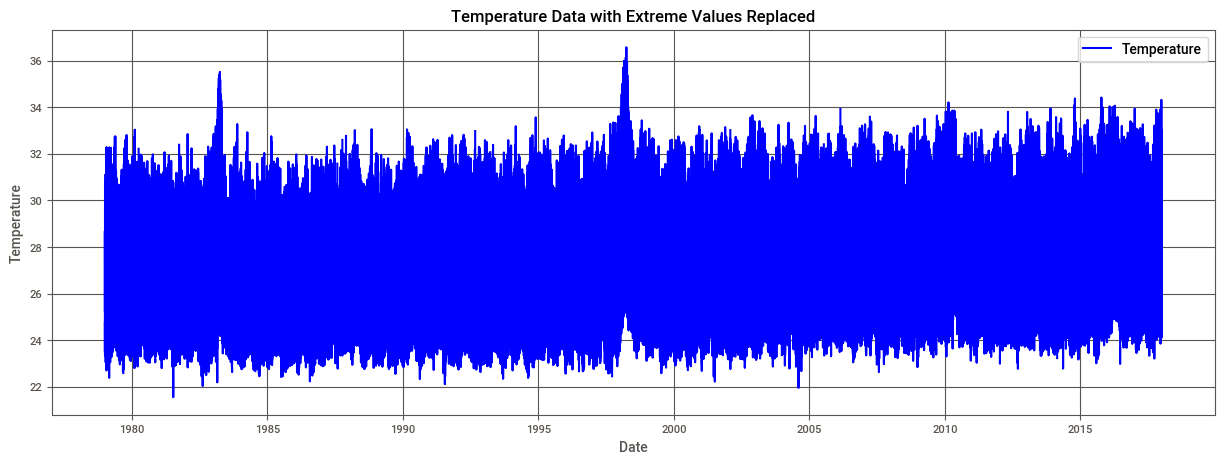

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Set kolom 'datetime' sebagai indeks
df.set_index('datetime', inplace=True)

# Melakukan Time Series Decomposition
result = seasonal_decompose(df['temp'], model='additive')

# Ambil tren dari hasil decomposition
trend = result.trend

# Batasi nilai ekstrem suhu
lower_limit = -30  # Batas bawah
upper_limit = 40  # Batas atas
df['temp'] = df.apply(lambda row: trend[row.name.month - 1] if row['temp'] > 40 else row['temp'], axis=1)

# Tampilkan visualisasi data setelah penggantian nilai
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['temp'], label='Temperature', color="blue")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Data with Extreme Values Replaced")
plt.legend()
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


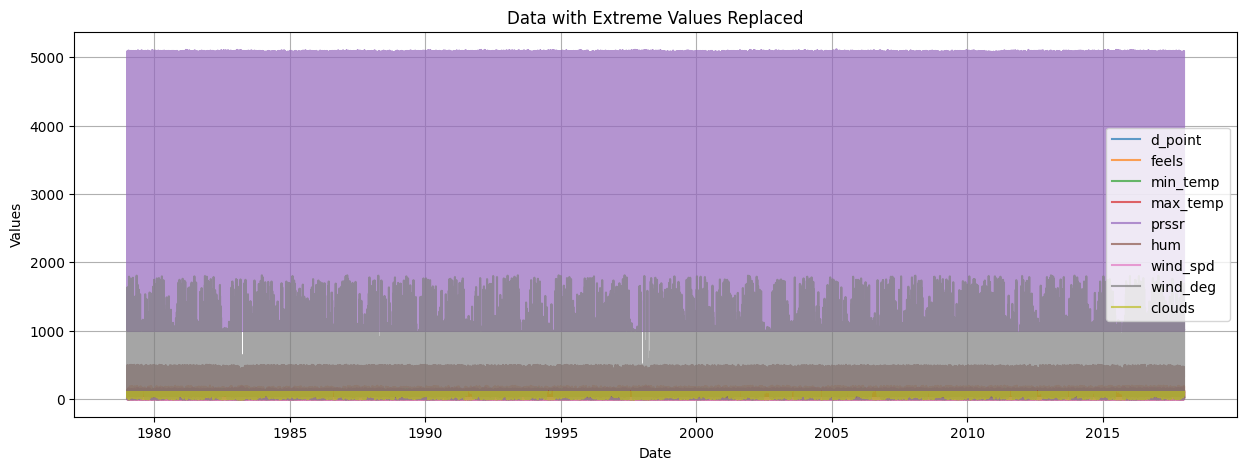

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Kolom-kolom yang akan diproses
columns_to_process = ["d_point", "feels", "min_temp", "max_temp", "prssr", "hum", "wind_spd", "wind_deg", "clouds"]

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Set kolom 'datetime' sebagai indeks
df.set_index('datetime', inplace=True)

# Melakukan Time Series Decomposition pada kolom-kolom yang diproses
for column in columns_to_process:
    result = seasonal_decompose(df[column], model='additive')
    trend = result.trend

    # Batasi nilai ekstrem pada setiap kolom
    lower_limit = df[column].min()  # Batas bawah sesuai dengan nilai minimum dalam kolom
    upper_limit = df[column].max()  # Batas atas sesuai dengan nilai maksimum dalam kolom
    df[column] = df.apply(lambda row: trend[row.name.month - 1] if row[column] > upper_limit else row[column], axis=1)

# Tampilkan visualisasi data setelah penggantian nilai
plt.figure(figsize=(15, 5))
for column in columns_to_process:
    plt.plot(df.index, df[column], label=column, alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Data with Extreme Values Replaced")
plt.legend()
plt.grid(True)
plt.show()

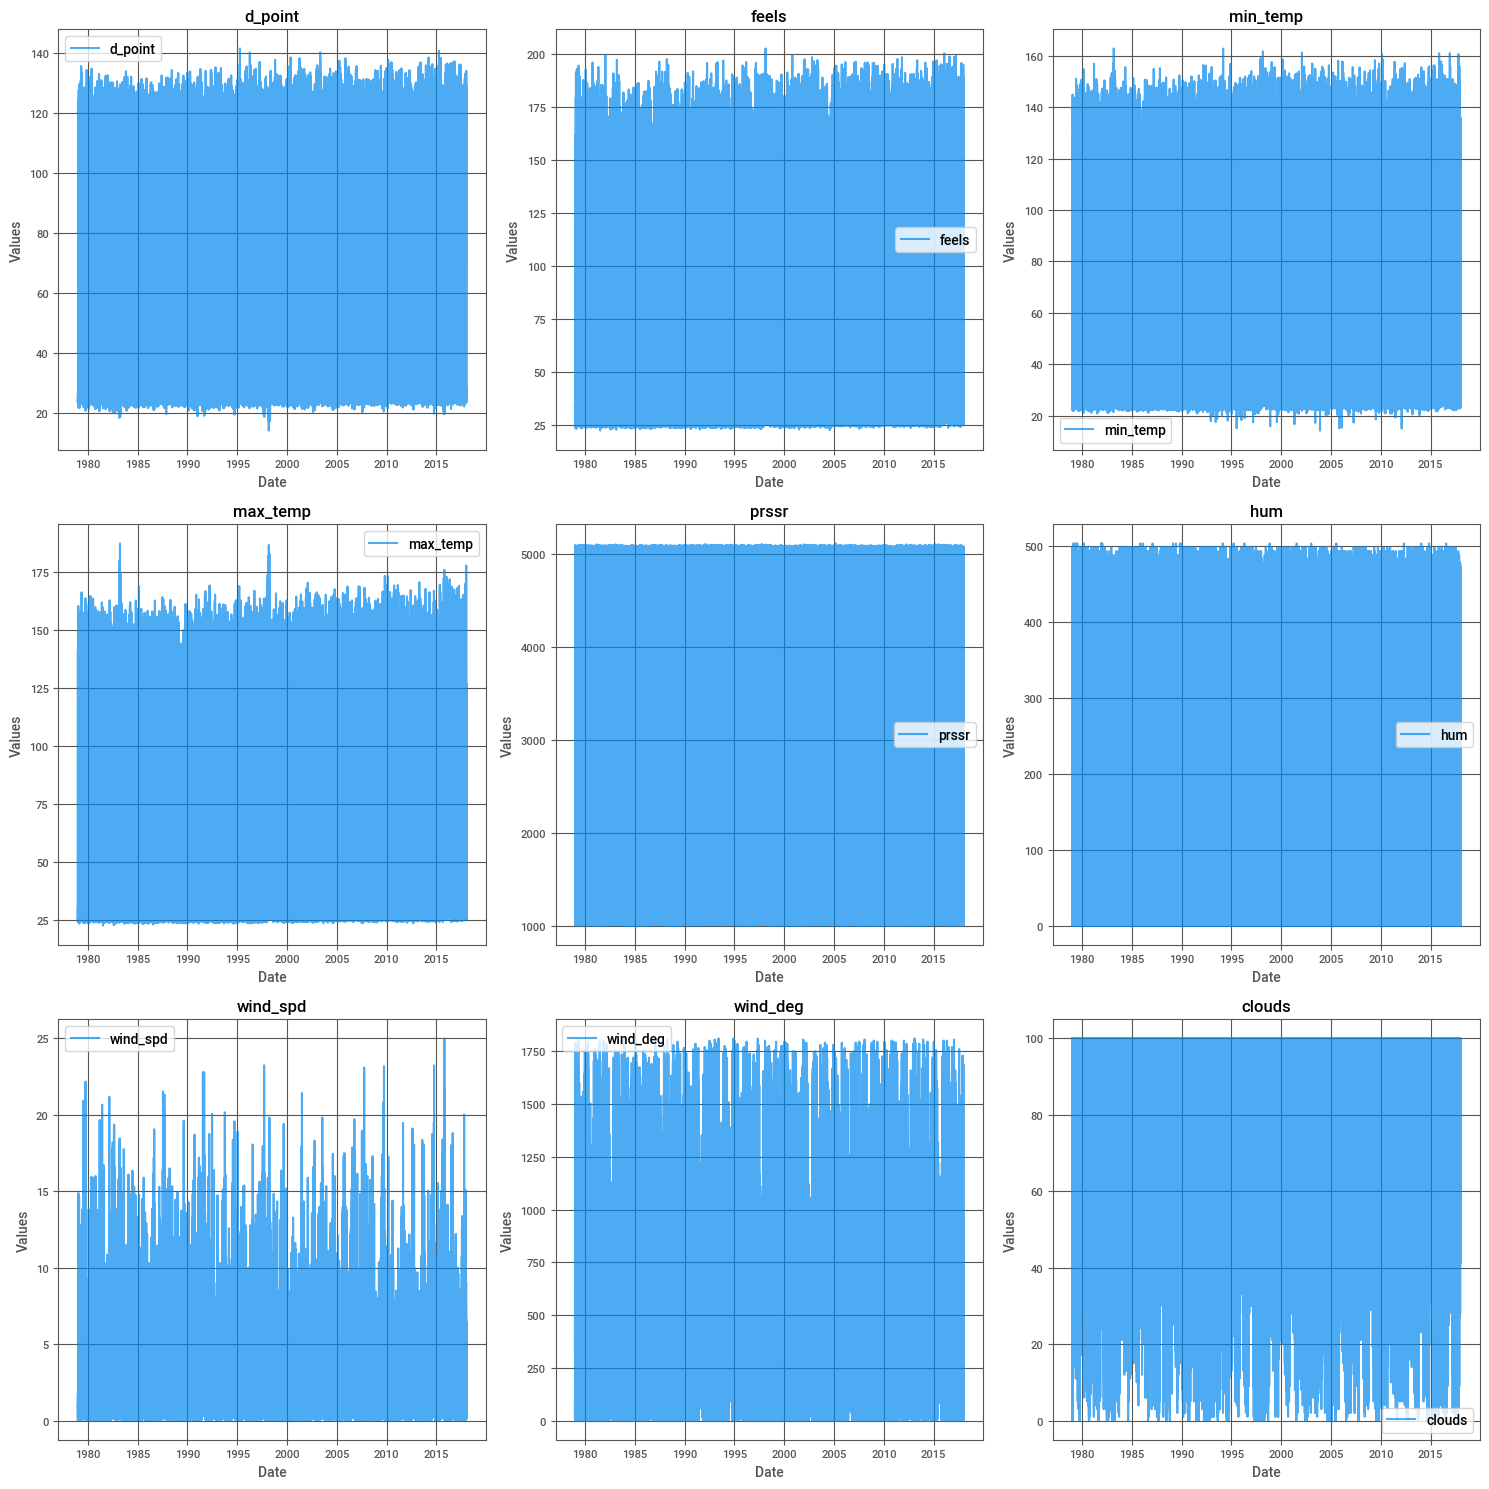

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Kolom-kolom yang akan diproses
columns_to_process = ["d_point", "feels", "min_temp", "max_temp", "prssr", "hum", "wind_spd", "wind_deg", "clouds"]

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Set kolom 'datetime' sebagai indeks
df.set_index('datetime', inplace=True)

# Jumlah kolom per gambar
columns_per_figure = 3

# Jumlah total kolom
total_columns = len(columns_to_process)

# Hitung jumlah baris dan kolom untuk subplot
num_rows = (total_columns + columns_per_figure - 1) // columns_per_figure

# Buat gambar dan subplot
fig, axes = plt.subplots(num_rows, columns_per_figure, figsize=(15, 5 * num_rows))

# Melakukan Time Series Decomposition pada kolom-kolom yang diproses
for i, column in enumerate(columns_to_process):
    result = seasonal_decompose(df[column], model='additive')
    trend = result.trend

    # Batasi nilai ekstrem pada kolom
    lower_limit = df[column].min()  # Batas bawah sesuai dengan nilai minimum dalam kolom
    upper_limit = df[column].max()  # Batas atas sesuai dengan nilai maksimum dalam kolom
    df[column] = df.apply(lambda row: trend[row.name.month - 1] if row[column] > upper_limit else row[column], axis=1)

    # Plot kolom pada subplot yang sesuai
    row_idx = i // columns_per_figure
    col_idx = i % columns_per_figure
    ax = axes[row_idx, col_idx]
    ax.plot(df.index, df[column], label=column, alpha=0.7)
    ax.set_xlabel("Date")
    ax.set_ylabel("Values")
    ax.set_title(column)
    ax.legend()
    ax.grid(True)

# Hapus subplot yang tidak digunakan jika ada
if total_columns % columns_per_figure != 0:
    for i in range(total_columns % columns_per_figure, columns_per_figure):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

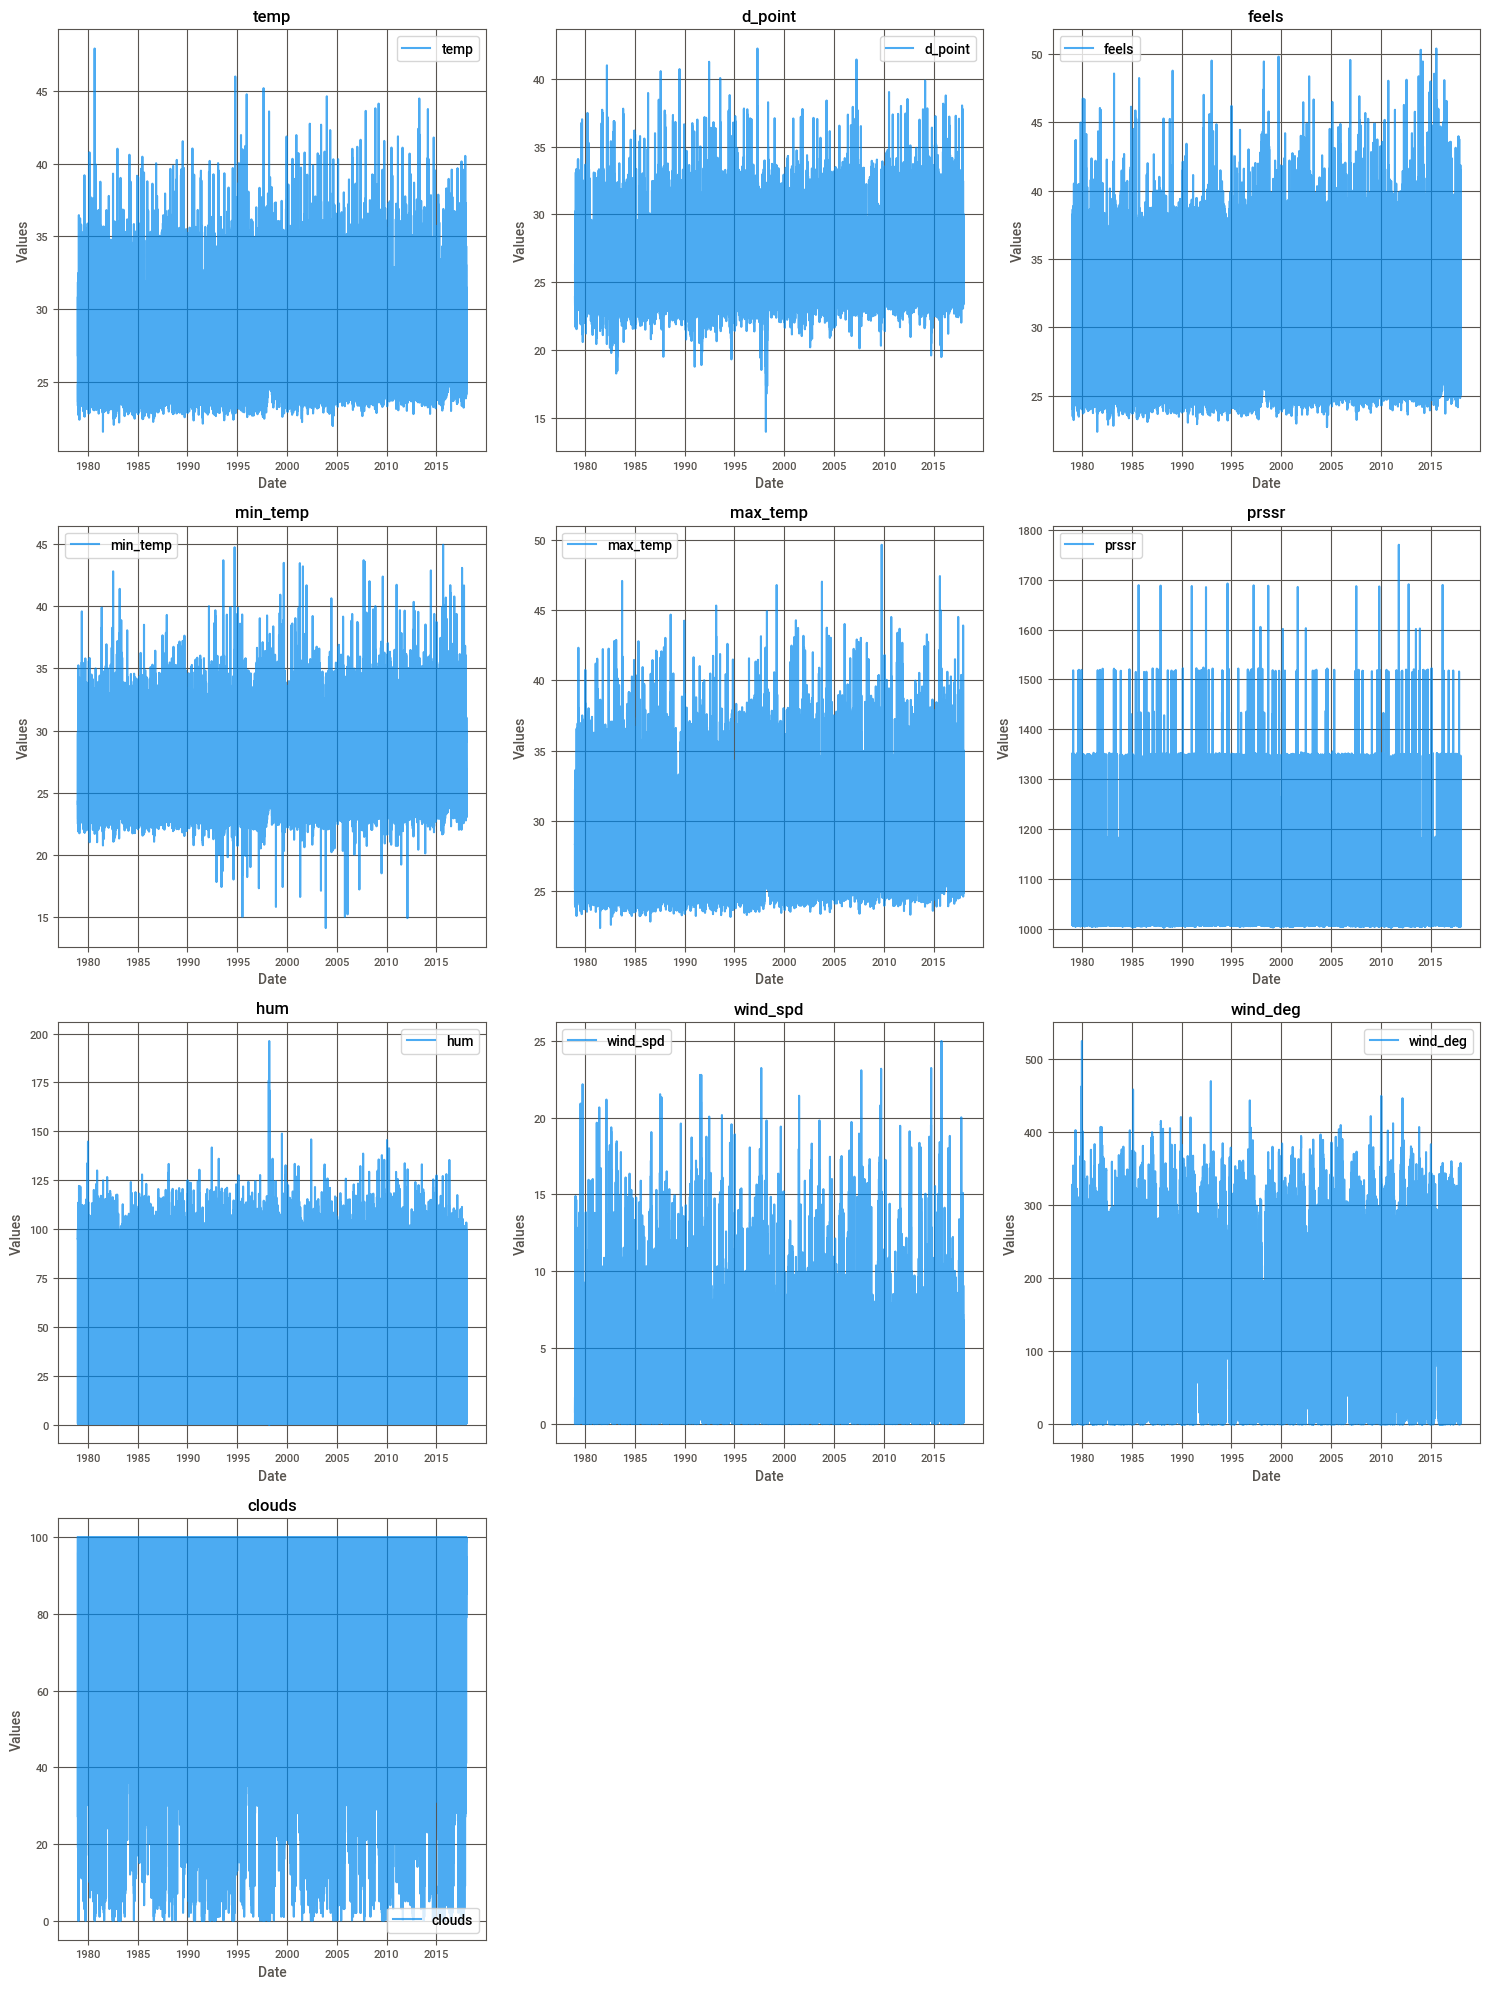

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Kolom-kolom yang akan diproses
columns_to_process = ["temp", "d_point", "feels", "min_temp", "max_temp", "prssr", "hum", "wind_spd", "wind_deg", "clouds"]

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Set kolom 'datetime' sebagai indeks
df.set_index('datetime', inplace=True)

# Jumlah kolom per gambar
columns_per_figure = 3

# Jumlah total kolom
total_columns = len(columns_to_process)

# Hitung jumlah baris dan kolom untuk subplot
num_rows = (total_columns + columns_per_figure - 1) // columns_per_figure

# Buat gambar dan subplot
fig, axes = plt.subplots(num_rows, columns_per_figure, figsize=(15, 5 * num_rows))

# Melakukan Time Series Decomposition pada kolom-kolom yang diproses
for i, column in enumerate(columns_to_process):
    result = seasonal_decompose(df[column], model='additive')
    trend = result.trend

    # Batas atas sesuai dengan batas yang diberikan
    upper_limit = 40 if column in ["d_point", "feels", "min_temp", "max_temp", "temp"] else 1600 if column == "prssr" else 200

    # Ganti nilai kolom yang melebihi batas atas dengan nilai tren
    df[column] = df.apply(lambda row: trend[row.name] if row[column] > upper_limit else row[column], axis=1)

    # Plot kolom pada subplot yang sesuai
    row_idx = i // columns_per_figure
    col_idx = i % columns_per_figure
    ax = axes[row_idx, col_idx]
    ax.plot(df.index, df[column], label=column, alpha=0.7)
    ax.set_xlabel("Date")
    ax.set_ylabel("Values")
    ax.set_title(column)
    ax.legend()
    ax.grid(True)

# Hapus subplot yang tidak digunakan jika ada
if total_columns % columns_per_figure != 0:
    for i in range(total_columns % columns_per_figure, columns_per_figure):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

In [21]:
# Simpan DataFrame ke dalam file CSV
df.to_csv("prepjadi1.csv")

In [35]:
df.describe()

,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,341880.0,341880.000000,341879.000000,341878.000000,341880.000000,341879.000000,341880.000000,341880.000000,341880.000000,341871.000000,320590.000000,341880.00000
mean,28800.0,26.770829,24.655797,29.415560,26.005687,27.780416,1013.376461,77.974568,1.474819,176.930845,0.360764,85.44976
std,0.0,2.297071,1.225252,4.391227,2.240975,2.351611,30.595693,30.453488,1.104015,77.746691,0.980127,22.80106
min,28800.0,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,0.360000,0.000000,0.000000,-1.000000,0.00000
25%,28800.0,24.980000,23.950000,25.990000,24.250000,25.970000,1009.000000,78.000000,0.880000,141.225000,0.000000,81.00000
50%,28800.0,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,90.000000,1.270000,189.583333,0.000000,97.00000
75%,28800.0,28.390000,25.240000,33.290000,27.640000,29.310000,1011.000000,96.000000,1.800000,229.270833,0.250000,100.00000
max,28800.0,47.915000,42.228333,50.417500,44.938125,49.656250,1770.375000,196.170000,25.000000,525.232083,27.100000,100.00000


In [36]:
# Simpan DataFrame yang telah diproses ke dalam file CSV
df.to_csv("prepjadi1.csv")

In [37]:
# Separating X and y
X = df.drop('rain_1h', axis=1)
y = df['rain_1h']

In [38]:
y

datetime
1979-01-01 00:00:00    0.00
1979-01-01 01:00:00    0.00
1979-01-01 02:00:00    0.00
1979-01-01 03:00:00    0.13
1979-01-01 04:00:00    0.34
                       ... 
2017-12-31 19:00:00    0.00
2017-12-31 20:00:00     NaN
2017-12-31 21:00:00    0.00
2017-12-31 22:00:00    0.30
2017-12-31 23:00:00    0.19
Name: rain_1h, Length: 341880, dtype: float64

In [39]:
X.describe()

,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds
count,341880.0,341880.000000,341879.000000,341878.000000,341880.000000,341879.000000,341880.000000,341880.000000,341880.000000,341871.000000,341880.00000
mean,28800.0,26.770829,24.655797,29.415560,26.005687,27.780416,1013.376461,77.974568,1.474819,176.930845,85.44976
std,0.0,2.297071,1.225252,4.391227,2.240975,2.351611,30.595693,30.453488,1.104015,77.746691,22.80106
min,28800.0,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,0.360000,0.000000,0.000000,0.00000
25%,28800.0,24.980000,23.950000,25.990000,24.250000,25.970000,1009.000000,78.000000,0.880000,141.225000,81.00000
50%,28800.0,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,90.000000,1.270000,189.583333,97.00000
75%,28800.0,28.390000,25.240000,33.290000,27.640000,29.310000,1011.000000,96.000000,1.800000,229.270833,100.00000
max,28800.0,47.915000,42.228333,50.417500,44.938125,49.656250,1770.375000,196.170000,25.000000,525.232083,100.00000


In [40]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('analyzeprep.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyzeprep.html was generated.


In [ ]:
# Simpan DataFrame yang telah diproses ke dalam file CSV
df.to_csv("prepjadi1.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


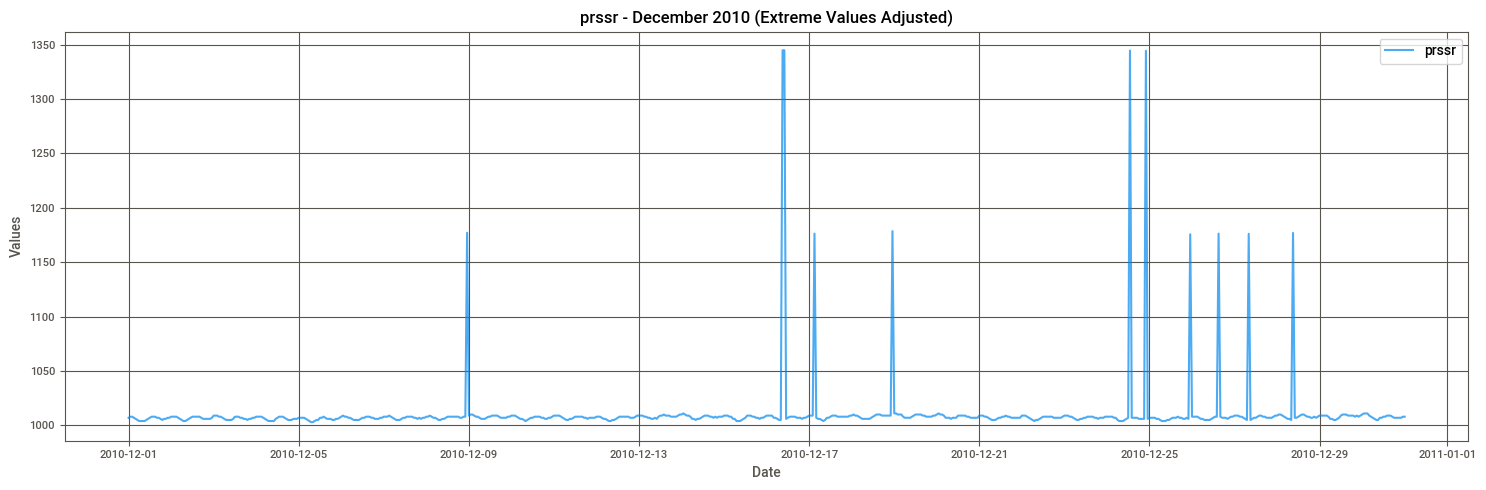

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
df = pd.read_csv("prep.csv")

# Konversi kolom 'datetime' ke tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')  # Kolom 'datetime' adalah unix timestamp

# Set kolom 'datetime' sebagai indeks
df.set_index('datetime', inplace=True)

# Filter data hanya untuk bulan Desember 2010
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2010-12-31')
december_2010_data = df[(df.index >= start_date) & (df.index <= end_date)]

# Kolom yang akan diproses
column_to_process = "prssr"

# Kolom yang akan diabaikan
columns_to_skip = ["rain_1h"]

# Melakukan Time Series Decomposition pada kolom yang diproses
result = seasonal_decompose(december_2010_data[column_to_process], model='additive')
trend = result.trend

# Batas atas sesuai dengan batas yang diberikan
upper_limit = 1050

# Ganti nilai kolom yang melebihi batas atas dengan nilai tren
december_2010_data[column_to_process] = december_2010_data.apply(lambda row: trend[row.name] if row[column_to_process] > upper_limit else row[column_to_process], axis=1)

# Plot kolom "prssr" yang sudah diubah ekstrem valuenya
plt.figure(figsize=(15, 5))
plt.plot(december_2010_data.index, december_2010_data[column_to_process], label=column_to_process, alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Values")
plt.title(f"{column_to_process} - December 2010 (Extreme Values Adjusted)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()